<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/hands_on_ml/Ch_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

1. Wisdom of crowd
2. Reduces the Variance
3. Bias remains the same




1.   Bagging
2.   Boosting
    1. AdaBoost
    2. GradBoosting
3.   Stacking
4. voting
    1. soft (if all classifiers have predict_proba())
    2. hard





#imports

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as pp

import os
import urllib
import tarfile
import urllib.request
from zipfile import ZipFile

import scipy
from scipy import stats

import sklearn
from sklearn import datasets

from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.datasets import fetch_openml
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.externals import joblib

from sklearn.multiclass import OneVsOneClassifier

from sklearn.neighbors import KNeighborsClassifier

from pandas.plotting import scatter_matrix

np.random.seed(42)
random.seed(42)

#Data

In [ ]:
iris = datasets.load_iris()
X, y = iris['data'], iris['target']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
print("test : ",len(X_test),"\ntrain : ",len(X_train))

test :  30 
train :  120


#SVC

In [ ]:
svm_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
param_grid = [
              {'linear_svc__loss':['hinge'],
               'linear_svc__C':[1,2,3,4,5,6,7,8,9, 10, 11],
               'linear_svc__max_iter':[1000, 100000]
               }
]
grid_search_svm = GridSearchCV(svm_clf, param_grid, cv=10, refit=True, verbose=0)
grid_search_svm.fit(X_train, y_train)
cvres = grid_search_svm.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
#     print(mean_score, params)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
best_svm_clf = grid_search_svm.best_estimator_#grid_search_svm.best_params_

In [ ]:
def confusion_plot(X_test, y_test, clf):
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    print("accuracy: ", accuracy)
    print("Confusion Matrix: \n",conf_mat)
    row_sums = conf_mat.sum(axis=1, keepdims=True)
    norm_conf_mat = conf_mat / row_sums
    np.fill_diagonal(norm_conf_mat, 0)
    plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
    plt.show()
confusion_plot(X_test, y_test, best_svm_clf)

NameError: ignored

#Logistic regression

In [ ]:
log_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ('log_clf', LogisticRegression())
])
pp.pprint(sorted(log_clf.get_params().keys()))

param_grid = [
              {'log_clf__penalty':['l2'],
               'log_clf__C' : [0.1, 1, 10] 
               }
]
grid_search_log = GridSearchCV(log_clf, param_grid, cv=10, refit=True, verbose=0)
grid_search_log.fit(X_train, y_train)
cvres = grid_search_log.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
#     print(mean_score, params)

In [ ]:
best_log_clf = grid_search_log.best_estimator_#grid_search_svm.best_params_

accuracy:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


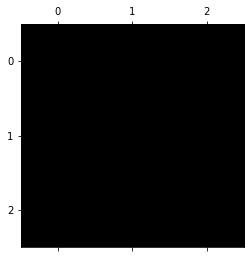

In [ ]:
confusion_plot(X_test, y_test, best_log_clf)

#Voting CLF

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9666666666666667
RandomForestClassifier 0.9333333333333333
SVC 0.9666666666666667
VotingClassifier 0.9666666666666667


# Bagging

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1)

In [ ]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


accuracy:  0.9666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


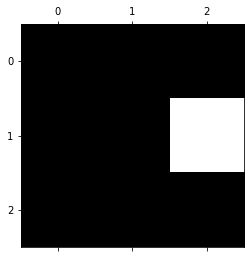

In [ ]:
confusion_plot(X_test, y_test, bag_clf)

accuracy:  1.0
Confusion Matrix: 
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


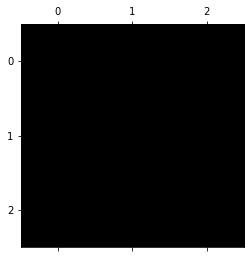

In [ ]:
confusion_plot(X_train, y_train, bag_clf)

##Out of bag

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=100, bootstrap=True, 
    n_jobs=-1,
    oob_score=True)

In [ ]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


accuracy:  0.9666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


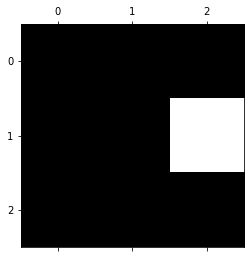

accuracy:  1.0
Confusion Matrix: 
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


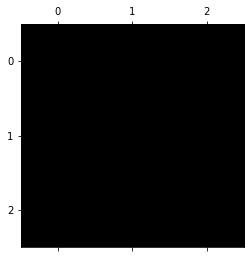

In [ ]:
confusion_plot(X_test, y_test, bag_clf)
confusion_plot(X_train, y_train, bag_clf)

In [ ]:
bag_clf.oob_score_

0.9416666666666667

In [ ]:
bag_clf.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [0.        , 0.51219512, 0.48780488],
       [0.        , 0.92682927, 0.07317073],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 1.        , 0.        ],
       [0.        , 0.58536585, 0.41463415],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.82608696, 0.17391304],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02222222, 0.97777778],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.775     , 0.225     ],
       [1.        , 0.        , 0.        ],
       [0.

#Random Forest

Test Data
accuracy:  0.9333333333333333
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


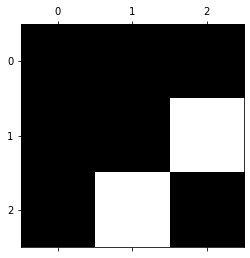

train data
accuracy:  1.0
Confusion Matrix: 
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


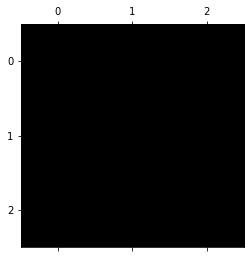

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=10, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print("Test Data")
confusion_plot(X_test, y_test, rnd_clf)
print("train data")
confusion_plot(X_train, y_train, rnd_clf)

In [ ]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.12061820656212868
sepal width (cm) 0.021748167810567737
petal length (cm) 0.4290640935889096
petal width (cm) 0.42856953203839393


#ExtraTreesClassifier

Test Data
accuracy:  0.9666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


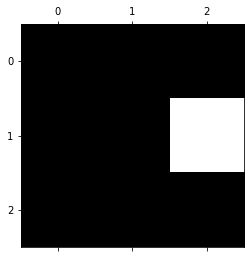

train data
accuracy:  1.0
Confusion Matrix: 
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


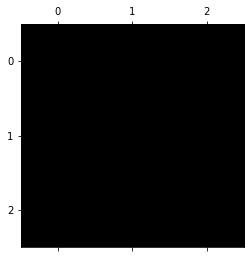

In [ ]:
ext_clf = ExtraTreesClassifier(n_estimators=500, max_depth=10, max_leaf_nodes=16, n_jobs=-1)
ext_clf.fit(X_train, y_train)
print("Test Data")
confusion_plot(X_test, y_test, ext_clf)
print("train data")
confusion_plot(X_train, y_train, ext_clf)

In [ ]:
for name, score in zip(iris["feature_names"], ext_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10563695708074283
sepal width (cm) 0.05001737330207498
petal length (cm) 0.39067807747464434
petal width (cm) 0.45366759214253793


#Boosting

##AdaBoostClassifier

Test Data
accuracy:  0.9333333333333333
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


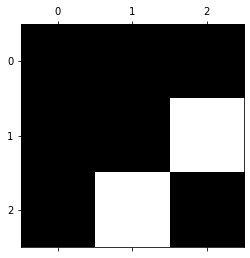

train data
accuracy:  1.0
Confusion Matrix: 
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


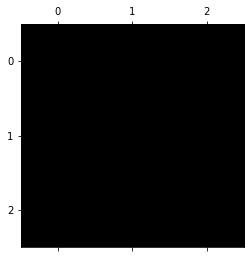

In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500, algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
print("Test Data")
confusion_plot(X_test, y_test, ada_clf)
print("train data")
confusion_plot(X_train, y_train, ada_clf)

##Gradient Boosting

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Test Data
accuracy:  0.8666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  3  7]]


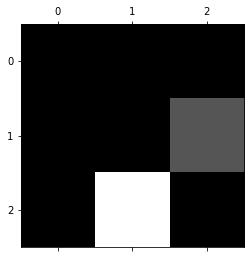

train data
accuracy:  1.0
Confusion Matrix: 
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


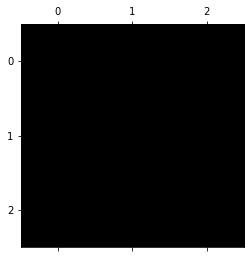

In [ ]:
print("Test Data")
confusion_plot(X_test, y_test, gbrt)
print("train data")
confusion_plot(X_train, y_train, gbrt)

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=120, learning_rate=0.1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

##best estimator

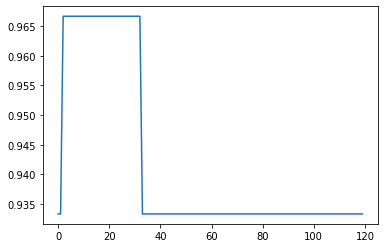

In [ ]:
acc = [accuracy_score(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmax(acc)
plt.plot(acc)

In [ ]:
gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators+1)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Test Data
accuracy:  0.9666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


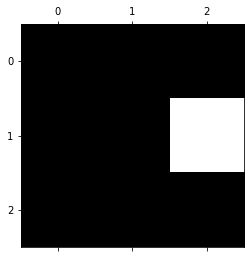

train data
accuracy:  0.9833333333333333
Confusion Matrix: 
 [[40  0  0]
 [ 0 38  2]
 [ 0  0 40]]


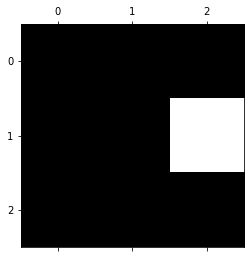

In [ ]:
print("Test Data")
confusion_plot(X_test, y_test, gbrt_best)
print("train data")
confusion_plot(X_train, y_train, gbrt_best)

In [ ]:
bst_n_estimators

2